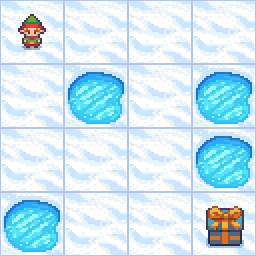

The **Frozen Lake v1** environment, provided by OpenAI Gym, is a popular grid-world environment used in reinforcement learning to test various algorithms. It presents a simple yet challenging scenario, ideal for understanding the basics of learning and decision-making under uncertainty. Check [this link](https://gymnasium.farama.org/environments/toy_text/frozen_lake/) for more details about this environment. This assignment involves understanding the process of training an agent using the SARSA and Q-learning algorithms in the Frozen Lake environment. **What you have to do is correctly filling in the blanks in the code.**

### 0. Import libararies

In [1]:
import gym
import numpy as np
from tqdm import tqdm
import random
import matplotlib.pyplot as plt

### 1. Environment details

In [2]:
# Create env
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", render_mode="rgb_array", is_slippery=False)

#observation, action space
print(f"observation space: {env.observation_space.n}")
print(f"action space: {env.action_space.n}")

observation space: 16
action space: 4


## Description
The game starts with the player at location [0,0] of the frozen lake grid world with the goal located at far extent of the world e.g. [3,3] for the 4x4 environment.

Holes in the ice are distributed in set locations when using a pre-determined map.

The player makes moves until they reach the goal or fall in a hole.

The episode starts with the player in state [0] (location [0, 0]).

The preloaded maps lookes like

"SFFF

FHFH

FFFH

HFFG"


where S stands for start point, H stands for hole, G stands for goal and F stands for the frozen path you can explore.


### 2. SARSA

In [24]:
# Define epilon greedy policy
def epsilon_greedy_policy(Q, state, epsilon=0.1):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(Q[state])  # Exploit

100%|██████████| 1000/1000 [00:00<00:00, 12902.06it/s]


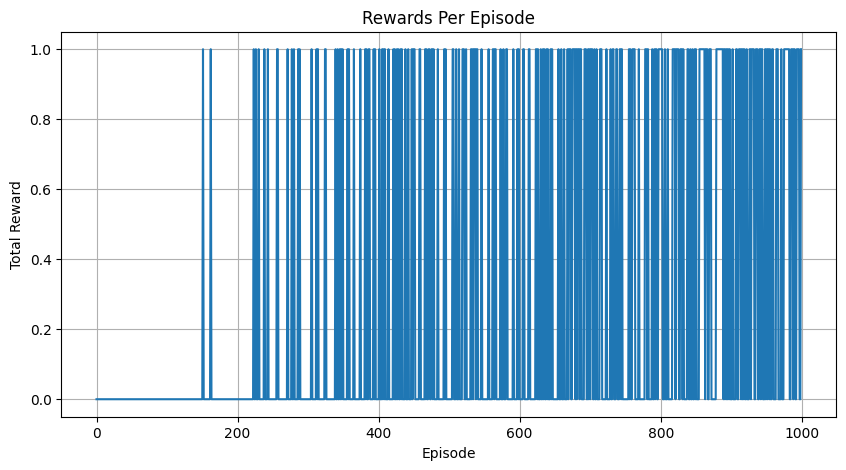

In [27]:
# Create and configure the environment
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)
num_episodes = 1000 # Do not change
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.999

####### TODO: Initialize Q-table##################################################
x = env.observation_space.n
y = env.action_space.n
Q = np.zeros((x, y))
##################################################################################

rewards = []

for episode in tqdm(range(num_episodes)):
    state = env.reset()
    if isinstance(state, tuple):
        state = state[0]
    action = epsilon_greedy_policy(Q, state, epsilon)
    total_reward = 0

    while True:
        next_state, reward, terminated, truncated, info = env.step(action)
        reward = int(reward)
        done = terminated or truncated
        total_reward += reward
        if isinstance(next_state, tuple):
            next_state = next_state[0]
        next_action = epsilon_greedy_policy(Q, next_state, epsilon)
        # print(f"state: {state}, action: {action}, reward: {reward}, next_state: {next_state}, next_action: {next_action}, done: {done}")


        ####### TODO: update Q function with the estimation of Q(s_{t+1}, a_{t+1})   
        ## Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * Q(s',a') - Q(s,a)]
   
        # Q[state][action] = Q[state][action] + alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])
        Q[state][action] = Q[state][action] + alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])
        ##########################################################################

        state, action = next_state, next_action
        if done:
            rewards.append(total_reward)
            epsilon *= epsilon_decay
            break

# Visualization of rewards
plt.figure(figsize=(10, 5))
plt.plot(rewards)

plt.title('Rewards Per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid(True)
plt.show()


Visualizing the learned policy(as directional arrows, Fill hole with 0):


e.x.

Learned Policy


```
[['↓' '→' '←' '←']
 ['↓' '0' '↓' '0']
 ['→' '→' '↓' '0']
 ['0' '→' '→' '0']]
```



In [28]:
####### TODO: Visualizing the learned policy######################################


print("Learned Policy (as directional arrows):")

Q_val_max = Q.max(axis=1).reshape(4,4)
Q_best_action = np.argmax(Q, axis=1).reshape(4,4)
policy_map = {0: '←', 1: '↓', 2: '→', 3: '↑'}
Q_directions = np.empty(Q_best_action.flatten().shape, dtype=str)
eps = np.finfo(float).eps

for idx, val in enumerate(Q_best_action.flatten()):
    if Q_val_max.flatten()[idx] >= eps:
        Q_directions[idx] = policy_map[val]
    else:
        Q_directions[idx] = '0'
Q_directions = Q_directions.reshape(4,4)
print(Q_directions)


##################################################################################

Learned Policy (as directional arrows):
[['↓' '←' '↓' '←']
 ['↓' '0' '↓' '0']
 ['→' '→' '↓' '0']
 ['0' '→' '→' '0']]


### 3. Q-Learning

100%|██████████| 1000/1000 [00:00<00:00, 8311.28it/s]


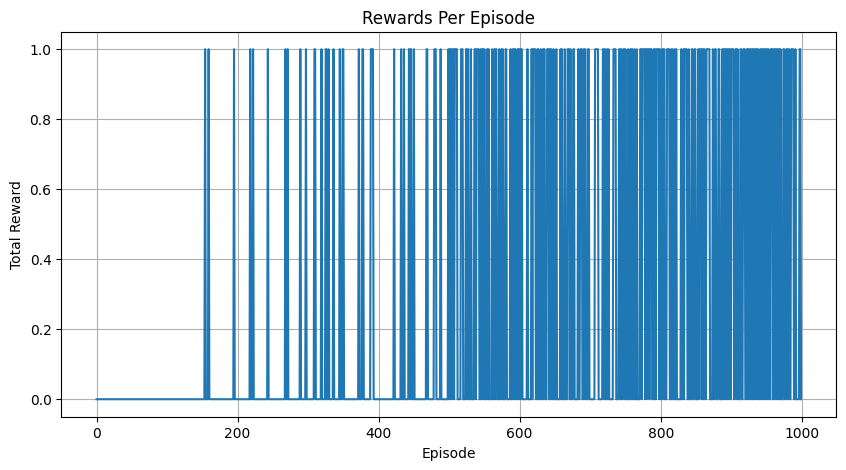

In [32]:
# Create the Frozen Lake environment
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False)
num_episodes = 1000 # Do not change
alpha = 0.01  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay = 0.999

####### TODO: Initialize Q-table##################################################
x = env.observation_space.n
y = env.action_space.n
Q = np.zeros((x, y))

##################################################################################
rewards = []  # List to store rewards for each episode

for episode in tqdm(range(num_episodes)):
    state = env.reset()
    if isinstance(state, tuple):
        state = state[0]
        
    total_reward = 0
    done = False

    while not done:
        action = epsilon_greedy_policy(Q, state, epsilon)
        next_state, reward, terminated, truncated, info = env.step(action)
        reward = int(reward)
        if isinstance(next_state, tuple):
            next_state = next_state[0]

        done = terminated or truncated
        total_reward += reward

        ####### TODO: Q-learning update rule######################################

        # Best action for next state
        # next_action = np.argmax(Q[next_state])
        next_action = epsilon_greedy_policy(Q, next_state, epsilon)
        # Compute TD target (벨만최적방정식)
        td_target = reward + gamma * np.max(Q[next_state][:])
        # Compute TD error
        td_error = td_target -Q[state][action]

        ##########################################################################

        Q[state][action] += alpha * td_error

        state = next_state

    rewards.append(total_reward)
    epsilon *= epsilon_decay # Reduce epsilon

# Plotting the rewards
plt.figure(figsize=(10, 5))
plt.plot(rewards)
plt.title('Rewards Per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.grid(True)
plt.show()


Visualizing the learned policy(as directional arrows, Fill the hole with 0):

e.x.

Learned Policy


```
[['↓' '→' '←' '←']
 ['↓' '0' '↓' '0']
 ['→' '→' '↓' '0']
 ['0' '→' '→' '0']]
```



In [34]:
####### TODO: Visualizing the learned policy######################################

print("Learned Policy (as directional arrows):")

Q_val_max = Q.max(axis=1).reshape(4,4)
Q_best_action = np.argmax(Q, axis=1).reshape(4,4)
policy_map = {0: '←', 1: '↓', 2: '→', 3: '↑'}
Q_directions = np.empty(Q_best_action.flatten().shape, dtype=str)
eps = np.finfo(float).eps

for idx, val in enumerate(Q_best_action.flatten()):
    if Q_val_max.flatten()[idx] >= eps:
        Q_directions[idx] = policy_map[val]
    else:
        Q_directions[idx] = '0'
Q_directions = Q_directions.reshape(4,4)
print(Q_directions)


##################################################################################

Learned Policy (as directional arrows):
[['→' '→' '↓' '←']
 ['↓' '0' '↓' '0']
 ['→' '→' '↓' '0']
 ['0' '→' '→' '0']]


### 4. Describe how SARSA and Q-learning algorithms differ. It is recommended to explain based on the differences in the code implementation. (Write your answer at the text block below)

The method used for selecting next_action employs the decaying epsilon-greedy methodology. Both algorithms were initially set with an epsilon of 1.0, gradually decreasing it to ensure exploration. Since initially there is no knowledge about the environment, the strategy involves selecting various actions to adequately gather information about the environment.

The difference between the two algorithms lies in the method of updating the action-value Q:

SARSA: Update Q(s,a) as follows: Q(s,a) := Q(s,a) + lr [R(s,a) + gamma * Q(s',a') - Q(s,a)]
Q-learning: Update Q(s,a) as follows: Q(s,a) := Q(s,a) + lr [R(s,a) + gamma * max_a' Q(s',a') - Q(s,a)]

The difference in the Temporal Difference (TD) target between Q-learning and SARSA is apparent. SARSA is based on the Bellman expectation equation and uses on-policy learning, where the behavior policy and the target policy are the same. This approach averages multiple samples from the given environment using a sample-based methodology. On the other hand, Q-learning is based on the Bellman optimality equation and uses off-policy learning, where the behavior policy and the target policy do not need to match. The optimal policy is dependent on the environment, indicating that any policy could theoretically be sufficient.